In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## CSV파일 로드

In [3]:
df = pd.read_csv("/Users/ohheungchan/workspace/AI_Study/abalone.csv")
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


## 결측치 확인

In [4]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

### 컬럼 설명

1. **Sex**: 전복의 성별 (M: 수컷, F: 암컷, I: 새끼)
2. **Length**: 전복의 최대 길이 (밀리미터 단위)
3. **Diameter**: 전복의 지름, 길이에 수직인 측정치 (밀리미터 단위)
4. **Height**: 전복의 높이, 껍질 속 고기 포함 (밀리미터 단위)
5. **Whole weight**: 전복 전체의 무게 (그램 단위)
6. **Shucked weight**: 전복 고기의 무게 (그램 단위)
7. **Viscera weight**: 전복의 내장 무게, 출혈 후 측정 (그램 단위)
8. **Shell weight**: 건조 후 전복 껍질의 무게 (그램 단위)
9. **Rings**: 전복의 고리 수, 나이 추정의 기준 (+1.5년)

In [5]:
df.info

<bound method DataFrame.info of      Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
id                                                                 
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  Rings  
id                                     

In [6]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

### 인코딩 (문자->수치)

In [7]:
# 'Sex'컬럼의 F/M을 수치화
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['Sex'] = label.fit_transform(df['Sex'])

(M->0, F->2, I->1)

/var/folders/9x/8whwzmnj6z5bjc7_h1txd9_r0000gn/T/ipykernel_59172/2749004283.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rings', data=df, palette='Set3')


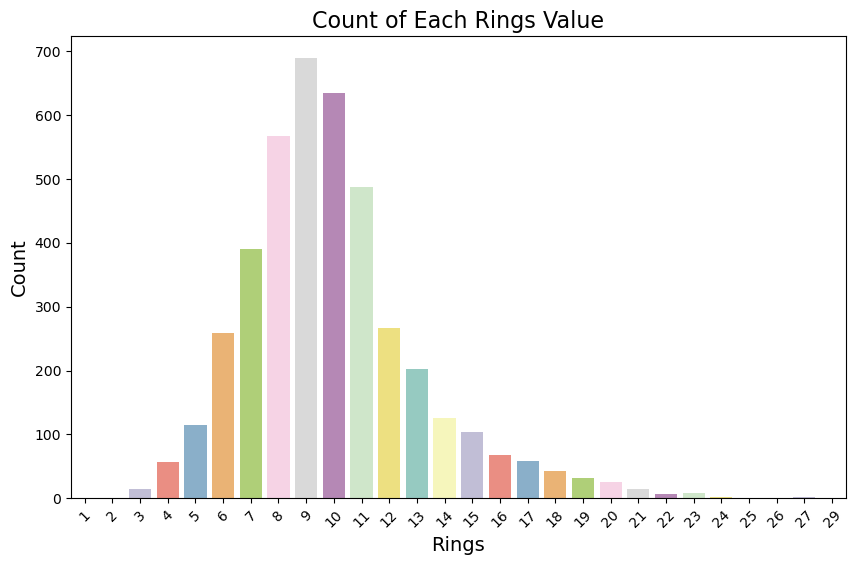

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# 카운트플롯 그리기
plt.figure(figsize=(10, 6))
sns.countplot(x='Rings', data=df, palette='Set3')
plt.title('Count of Each Rings Value', fontsize=16)
plt.xlabel('Rings', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)  # x축 값이 겹치지 않도록 회전
plt.show()

## 각 피쳐간의 상관관계를 확인.

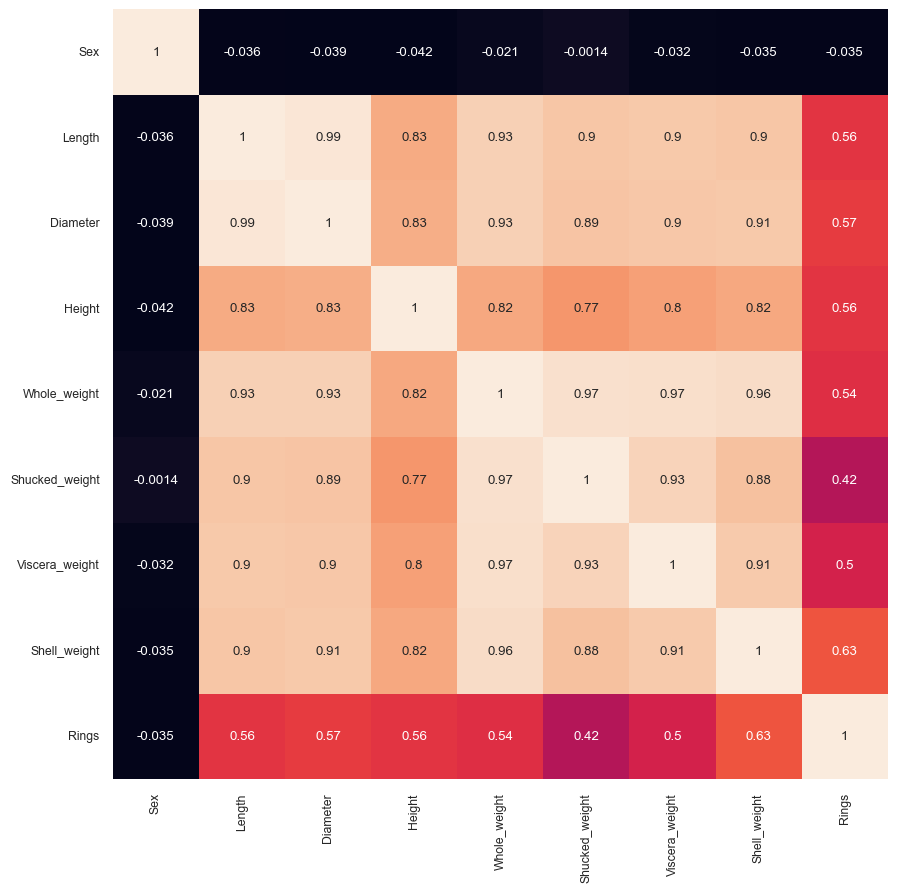

In [9]:
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [10]:
y = df["Rings"]
y 

id
0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [11]:
y.value_counts

<bound method IndexOpsMixin.value_counts of id
0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64>

In [12]:
x = df.drop("Rings" , axis = 1)
x

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080


In [13]:
print(x.shape)
print(y.shape)

(4177, 8)
(4177,)


In [14]:
# train/test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=423)

In [15]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((3341, 8), (3341,), (836, 8), (836,))

In [16]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

model = Sequential()
model.add(Dense(10, input_shape=(8,), activation='relu'))  
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1,))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Metal device set to: Apple M2 Pro


2024-09-22 02:40:08.629101: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-22 02:40:08.629548: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                90        
                                                                 
 dense_1 (Dense)             (None, 50)                550       
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3,241
Trainable params: 3,241
Non-trainable params: 0
_________________________________________________________________


In [17]:
N_EPOCHS = 200

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/200


2024-09-22 02:40:08.911454: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-09-22 02:40:09.202806: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


105/105 [==============================] - 2s 9ms/step - loss: 34.9068 - mse: 34.9068 - val_loss: 9.1167 - val_mse: 9.1167
Epoch 2/200
  1/105 [..............................] - ETA: 0s - loss: 8.4681 - mse: 8.4681

2024-09-22 02:40:10.360394: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


105/105 [==============================] - 1s 6ms/step - loss: 7.9855 - mse: 7.9855 - val_loss: 7.9292 - val_mse: 7.9292
Epoch 3/200
105/105 [==============================] - 1s 6ms/step - loss: 7.4202 - mse: 7.4202 - val_loss: 7.0339 - val_mse: 7.0339
Epoch 4/200
105/105 [==============================] - 1s 6ms/step - loss: 7.1599 - mse: 7.1599 - val_loss: 7.1222 - val_mse: 7.1222
Epoch 5/200
105/105 [==============================] - 1s 6ms/step - loss: 7.0138 - mse: 7.0138 - val_loss: 6.7313 - val_mse: 6.7313
Epoch 6/200
105/105 [==============================] - 1s 6ms/step - loss: 6.8274 - mse: 6.8274 - val_loss: 6.4115 - val_mse: 6.4115
Epoch 7/200
105/105 [==============================] - 1s 6ms/step - loss: 6.6618 - mse: 6.6618 - val_loss: 6.4148 - val_mse: 6.4148
Epoch 8/200
105/105 [==============================] - 1s 6ms/step - loss: 6.4415 - mse: 6.4415 - val_loss: 6.0061 - val_mse: 6.0061
Epoch 9/200
105/105 [==============================] - 1s 6ms/step - loss: 6.2636

2024-09-22 02:42:16.618071: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


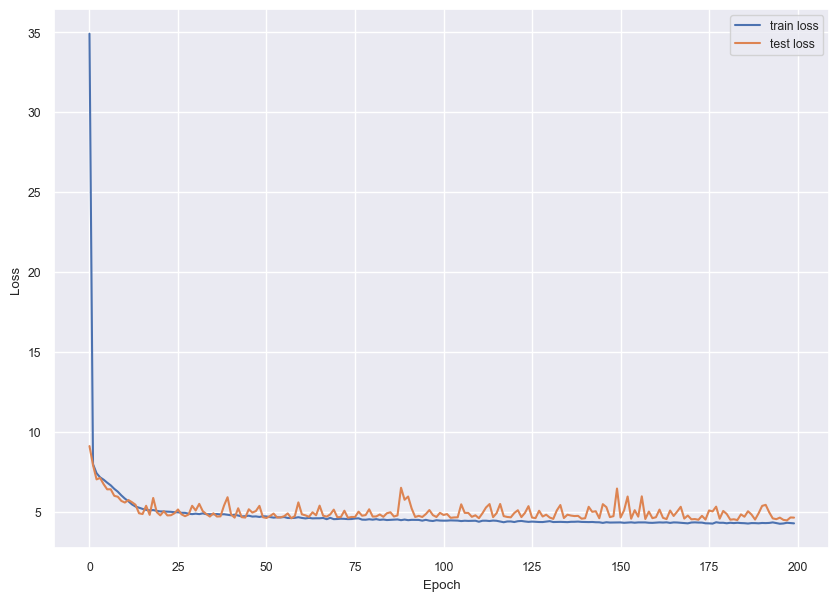

In [18]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

27/27 [==============================] - 0s 2ms/step
MSE: 4.642021897576428
MAE: 1.537046983766784
R^2 Score: 0.5349281495183087


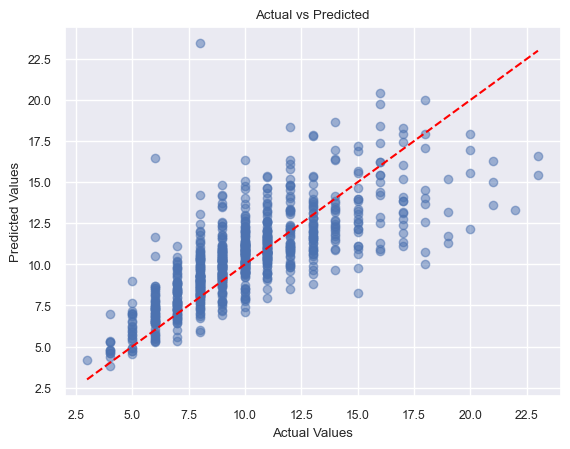

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

predy = model.predict(X_test)

mse = mean_squared_error(y_test, predy)
mae = mean_absolute_error(y_test, predy)
r2 = r2_score(y_test, predy)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2 Score: {r2}')

plt.scatter(y_test, predy, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()